## В этом ноутбуке реализованы линейная регрессия, линейный классификатор и логистическая регрессия, а также решена двумя способами задача Яндекса на определение класса точек, сгенерированных разными генераторами. 
### Ноутбук составлен по мотивам лекций профессора Воронцова по ML для МФТИ и ШАД

In [1]:
import matplotlib.pyplot as plt
import random
from random import uniform
import math
from math import cos, sin, pi
import numpy as np

### 1. Линейная регрессия

Построим модель линейной регрессии и обучим ее с помощью метода Stochastic Gradient Descent, реализовав его тут же

Независимая переменная

In [2]:
x_arr = [i for i in range(-20, 20)]

Зависимая переменная - правильные ответы. Будем ее аппроксимировать линейной регрессией

In [3]:
y_hat = [0.2*x - 14 for x in x_arr]

Text(0.5, 0, 'x_arr')

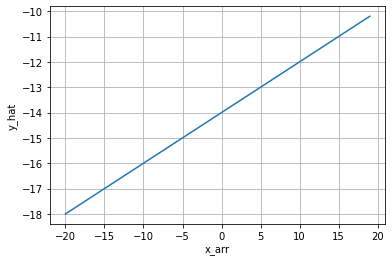

In [4]:
plt.plot(x_arr, y_hat)
plt.grid()
plt.ylabel('y_hat')
plt.xlabel('x_arr')

Задаем веса коэффициентов w[0], который при переменной, и w[1], который при bias

In [5]:
w = [uniform(-1, 1), uniform(-1, 1)]

In [6]:
h = 0.001 # - скорость обучения
lmbd = 0.05 # - скорость забывания для расчета скользящей экспоненциальной средней

In [7]:
def SGD(x_arr, y_hat, h, lmbd, w):
    q = 1e3 # - метрика функционала качества (эмпирический риск), экспоненциальную скользящую среднюю которого будем оценивать
    cntr = 1
    while abs(q) > 0.25:
#         if cntr % 10 ==0: print(f"w[0] before = {w[0]}, w1 before = {w[1]}")
        i = random.randint(0, len(x_arr) - 1) # выбор экземпляра из массива независимых переменных для обучения - случаен
        # рассчитываем значение ошибки
        err = w[0]*x_arr[i] + w[1] - y_hat[i]
        q = lmbd*err + (1 - lmbd)*q 
        # делаем шаги по весам
        w[0] = w[0] - h*2*err*x_arr[i]
        w[1] = w[1] - h*2*err
#         if cntr % 10 ==0: print(f"q = {q}, err = {err}, w[0] = {w[0]}, w1 = {w[1]}")
        cntr += 1
        if q > 1e4: break
    return w

In [8]:
SGD(x_arr, y_hat, h, lmbd, w)

[0.18589309001991947, -13.754175904526257]

Получили веса w, проверяем. q, к которой стремимся в SGD, специально выбрана большой (0.25), чтобы графики не сливались

In [9]:
y_pred = [w[0]*x + w[1] for x in x_arr]

Text(0.5, 0, 'x_arr')

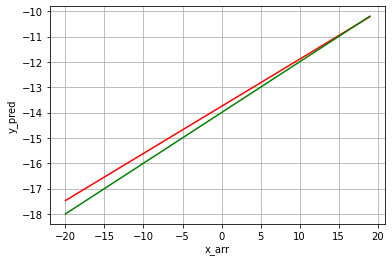

In [10]:
plt.plot(x_arr, y_pred, 'r')
plt.plot(x_arr, y_hat, 'g')
plt.grid()
plt.ylabel('y_pred')
plt.xlabel('x_arr')

Можно пробовать раскомментировать, чтобы менять аппроксимируемую функцию

Попробуем теперь аппроксимировать не линейную функцию, а более сложный полином

In [11]:
x_arr = [i for i in np.arange(-5, 5, 0.5)]
y_hat = [x*x + 4 for x in x_arr]
# y_hat = [x*x*x + 4*x*x + 5 for x in x_arr]

Text(0.5, 0, 'x_arr')

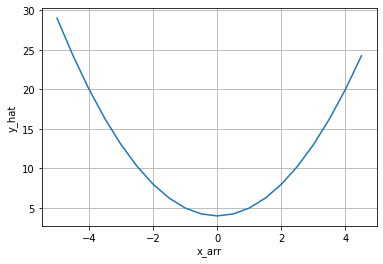

In [12]:
plt.plot(x_arr, y_hat)
plt.grid()
plt.ylabel('y_hat')
plt.xlabel('x_arr')

Здесь небольшое отличие от стандартного алгоритма - пришлось сделать разные LR для разных коэффициентов, иначе q быстро улетает в бесконечность, если h хотя бы 10-5, а если h меньше - то обучение очень медленное

In [13]:
h = [0.000001, 0.00001, 0.0001, 0.001, 0.001]
lmbd = 0.001

In [14]:
w = [uniform(-1, 1), uniform(-1, 1), uniform(-1, 1), uniform(-1, 1), uniform(-1, 1)]

In [15]:
from time import sleep

Если хочется все графики на одних осях - закомментировать plt.pause. Если нужно видеть динамику - раскомментировать.
log_rate управляет тем, как много графиков рисовать. 

Нужно обратить внимание, что лямбда, как в линейной, 0.05 не подойдет. В более сложных типа полиномов и логистической нужно снижать лямбду, чтобы короткая серия нулевых ошибок не остановила обучение слишком рано.

Алгоритм SGD_poly, представленный ниже, абсолютно такой же, как тот, что откомментирован выше, просто веса обновляются для 5 переменных, а не для двух

In [16]:
log_rate = 200
def SGD_poly(x_arr, y_hat, h, lmbd, w):
    q = 1000
    cntr = 1
    while abs(q) > 0.001:
        
        y_pred = [w[0]*math.pow(x,4) + w[1]*math.pow(x,3) + w[2]*math.pow(x,2)+ w[3]*x + w[4] for x in x_arr]

        # Рисовалка графиков, чтобы видеть, как идет обучение
        if cntr % log_rate == 0:
            plt.axis([-5, 5, -10, 20])
            plt.plot(x_arr, y_hat, 'g')
            plt.plot(x_arr, y_pred, 'r')
            plt.ylabel('y_pred')
            plt.xlabel('x_arr')
            plt.grid()
#             plt.pause(0.001)
        
#         if cntr % log_rate == 0: print(f"w[0] before = {w[0]}, w1 before = {w[1]}, w[2] before = {w[2]}, w3 before = {w[3]}, w4 before = {w[4]}")
        i = random.randint(0, len(x_arr) - 1)
        err = w[0]*math.pow(x_arr[i], 4) + w[1]*math.pow(x_arr[i], 3) + w[2]*math.pow(x_arr[i], 2) + w[3]*x_arr[i] + w[4] - y_hat[i]
        q = lmbd*err + (1 - lmbd)*q
        w[0] = w[0] - h[0]*2*err*math.pow(x_arr[i], 4)
        w[1] = w[1] - h[1]*2*err*math.pow(x_arr[i], 3)
        w[2] = w[2] - h[2]*2*err*math.pow(x_arr[i], 2)
        w[3] = w[3] - h[3]*2*err*x_arr[i]
        w[4] = w[4] - h[4]*2*err
#         if cntr % log_rate == 0: print("err = {:.3f}, q = {:.3f}, w[0] = {:.3f}, w1 = {:.3f}, w[2] = {:.3f}, w3 = {:.3f}, w4 = {:.3f}\n"
#                                  .format(err, q, w[0], w[1], w[2], w[3], w[4]))
#         if cntr % log_rate == 0: print("dw1 = {:.6f}, dw[2] = {:.6f}, dw3 = {:.6f}, dw4 = {:.6f}\n"
#                                  .format(h[0]*2*err*math.pow(x_arr[i], 4), h[1]*2*err*math.pow(x_arr[i], 3), 
#                                          h[2]*2*err*math.pow(x_arr[i], 2), h[3]*2*err*x_arr[i], h[4]*2*err))
        cntr += 1
        if cntr > 5000: break
        if q > 1e5: break
    return w, q, cntr

([0.0026146366294418967,
  0.0012753711220150012,
  0.9362154394059832,
  -0.020448996095252234,
  4.251420464735387],
 6.75859714262585,
 5001)

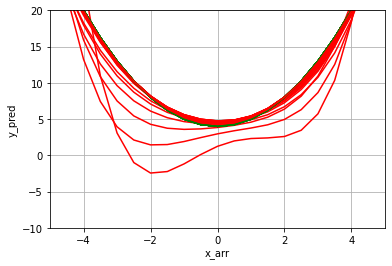

In [17]:
SGD_poly(x_arr, y_hat, h, lmbd, w)

### 2. Линейный классификатор

До этого рассматривали линейную регрессию, которая пытается аппроксимировать функцию. Попробуем линейный классификатор, который будет выдавать значения классов

In [18]:
x_arr = [i for i in range(10)]
y_hat = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
# y_hat = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

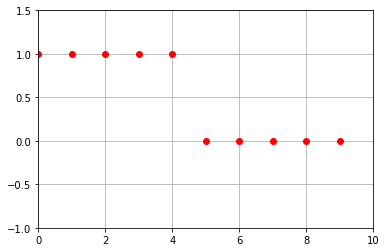

In [19]:
plt.plot(x_arr, y_hat, 'ro')
plt.grid()
plt.axis([0, 10, -1, 1.5])
plt.show()

In [20]:
def sign(x):
    return 1 if x >= 0 else 0

In [21]:
log_rate = 10
w = [uniform(-1, 1), 1]
h = 0.001
lmbd = 0.001
def SGD(x_arr, y_hat, h, lmbd, w):
    q = 1e2
    cntr = 1
    while abs(q) > 0.001:
#         if cntr % 1 ==0: print(f"w[0] before = {w[0]}, w1 before = {w[1]}")
        i = random.randint(0, len(x_arr) - 1)
        err = sign(w[0]*x_arr[i] + w[1]) - y_hat[i]
        q = lmbd*err + (1 - lmbd)*q
        w[0] = w[0] - h*2*err*x_arr[i]
        w[1] = w[1] - h*2*err
#         if cntr % log_rate ==0: print(f"q = {q}, err = {err}, w[0] = {w[0]}, w1 = {w[1]}")
        cntr += 1
        if q > 1e4: break
    return w

In [22]:
SGD(x_arr, y_hat, h, lmbd, w)

[-0.2487658927234906, 1.016]

In [23]:
y_pred = [w[0]*x + w[1] for x in x_arr]

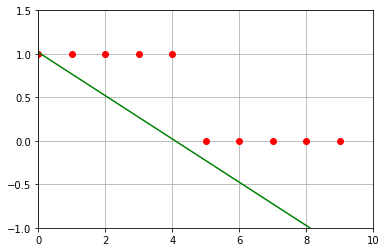

In [24]:
plt.plot(x_arr, y_hat, 'ro')
plt.plot(x_arr, y_pred, 'g')
plt.grid()
plt.axis([0, 10, -1, 1.5])
plt.show()

In [25]:
for x in range(10):
    print(x, sign(w[0]*x + w[1]))

0 1
1 1
2 1
3 1
4 1
5 0
6 0
7 0
8 0
9 0


### 3. Логистическая регрессия (которая на самом деле еще и классификатор)

In [26]:
# Логистическая - или сигма - функция, откуда и пошло название регрессии
def sig(x):
    return 1 / (1 + math.exp(-x))

Градиентный спуск ничем не отличается от линейной регрессии, только производная от функции ошибки чуть другая

In [27]:
log_rate = 20
w = [uniform(-1, 1), 1]
h = 0.003
lmbd = 0.001
def SGD_logistic(x_arr, y_hat, h, lmbd, w):
    q = 1e2
    cntr = 1
    while abs(q) > 0.001:
#         if cntr % log_rate ==0: print(f"w[0] before = {w[0]}, w1 before = {w[1]}")
        i = random.randint(0, len(x_arr) - 1)
        err = sig(w[0]*x_arr[i] + w[1]) - y_hat[i]
        q = lmbd*err + (1 - lmbd)*q
        w[0] = w[0] - h*2*err*x_arr[i]
        w[1] = w[1] - h*2*err
#         if cntr % log_rate ==0: print(f"q = {q}, err = {err}, w[0] = {w[0]}, w1 = {w[1]}")
        cntr += 1
        if q > 1e4: break
    return w

In [28]:
SGD_logistic(x_arr, y_hat, h, lmbd, w)

[-0.9614435857503066, 3.98694304525476]

In [29]:
def logistic(x, w):
    return sig(w[0]*x + w[1])

In [30]:
y_pred = [logistic(x, w) for x in x_arr]

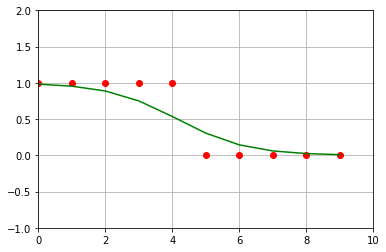

In [31]:
plt.plot(x_arr, y_hat, 'ro')
plt.plot(x_arr, y_pred, 'g')
plt.grid()
plt.axis([0, 10, -1, 2])
plt.show()

In [32]:
logistic(4, w)

0.5352336818189749

### 4. Задача Яндекса

Пробуем логистическую регрессию на задаче Яндекса

Петя написал два генератора точек в круге:

def generate1():  
    a = uniform(0, 1)  
    b = uniform(0, 1)  
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))


def generate2():  
    while True:  
        x = uniform(-1, 1)  
        y = uniform(-1, 1)  
        if x ** 2 + y ** 2 > 1:  
            continue  
        return (x, y)
        
        
Даны 100 наборов по 1000 точек, каждый набор сгенерирован каким-то одним из этих двух алгоритмов. Необходимо определить для каждого набора, первый или второй алгоритм использовался для его генерации.
Для того, чтобы получить ОК по этой задаче, надо предсказать правильный генератор хотя бы для 98 наборов.

In [33]:
def generate1():
    a = uniform(0, 1)
    b = uniform(0, 1)
    return (a * cos(2 * pi * b), a * sin(2 * pi * b))

In [34]:
def generate2():  
    while True:  
        x = uniform(-1, 1)  
        y = uniform(-1, 1)  
        if x ** 2 + y ** 2 > 1:  
            continue  
        return (x, y)

In [35]:
x1_eta = []
y1_eta = []
for i in range(1000):
    x, y = generate1()
    x1_eta.append(x)
    y1_eta.append(y)

In [36]:
x2_eta = []
y2_eta = []
for i in range(1000):
    x, y = generate2()
    x2_eta.append(x)
    y2_eta.append(y)

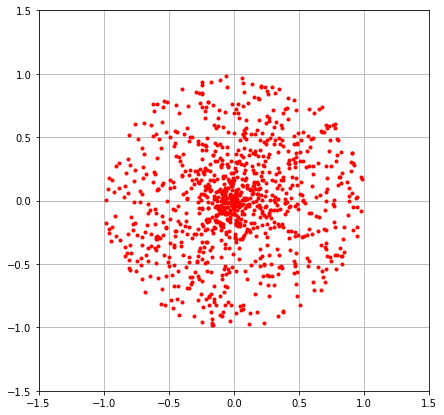

In [37]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x1_eta, y1_eta, 'r.')
ax.grid()
ax.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

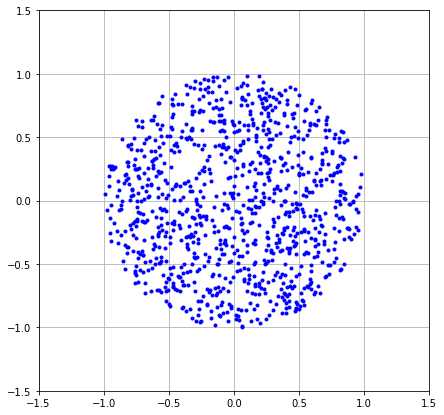

In [38]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x2_eta, y2_eta, 'b.')
# ax.plot(x1, y1, 'r.')
ax.grid()
ax.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

#### Оффтопик

Эту задачу легко можно решить критерием Колмогорова-Смирнова: Генерируем два пробных распределения и сравниваем их с эталонными. Там, где семейство одно, pvalue будет высоким, там, где семейства разные, будет стремиться к нулю. 

In [39]:
from scipy import stats
rng = np.random.default_rng()

In [40]:
x1 = []
y1 = []
for i in range(1000):
    x, y = generate1()
    x1.append(x)
    y1.append(y)

In [41]:
x2 = []
y2 = []
for i in range(1000):
    x, y = generate2()
    x2.append(x)
    y2.append(y)

In [42]:
print(stats.kstest(x1, x1_eta))
print(stats.kstest(x2, x1_eta))
print(stats.kstest(y1, y1_eta))
print(stats.kstest(y1, y2_eta))

KstestResult(statistic=0.024, pvalue=0.9357699014782725)
KstestResult(statistic=0.114, pvalue=4.441088228134397e-06)
KstestResult(statistic=0.021, pvalue=0.9802627322900355)
KstestResult(statistic=0.116, pvalue=2.798513019401821e-06)


#### Теперь решаем логистической регрессией

Экземпляром в этой задаче является не точка, а набор точек. Причем точки в наборе качестве экземпляров рассматривать не получится, так как они двухмерные, а логистическая регрессия, как и почти все классификаторы, принимают только одномерные значения признаков (фич). Нужно преобразовать их в одномерные - самое простое - считать евклидово расстояние до центра координат

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
def eucl(x, y):
    return math.sqrt(x*x + y*y)

Генерируем обучающую выборку и учим классификтаор

In [45]:
def gen_train_set(generator, label, nsamples=100, nparams=100):
    train_set_x = []
    train_set_y = []
    for i in range(nsamples):
        sample = []
        for j in range(nparams):
            x, y = generator()
            sample.append(eucl(x, y))
        train_set_x.append(sample)
        train_set_y.append(label)
    return np.array(train_set_x), np.array(train_set_y)

In [46]:
train_x1, train_y1 = gen_train_set(generate1, 1, nsamples=500, nparams=100)
train_x2, train_y2 = gen_train_set(generate2, 2, nsamples=500, nparams=100)
train_x = np.concatenate((train_x1, train_x2), axis=0)
train_y = np.concatenate((train_y1, train_y2), axis=0)
clf = LogisticRegression().fit(train_x, train_y)

Генерируем тестовую выборку и проверяем классификатор

In [47]:
test_x1, test_y1 = gen_train_set(generate1, 1, nsamples = 1, nparams = 100)
test_x2, test_y2 = gen_train_set(generate2, 2, nsamples = 1, nparams = 100)

In [48]:
clf.predict_proba(test_x1)

array([[0.99269761, 0.00730239]])

In [49]:
clf.predict_proba(test_x2)

array([[0.09869118, 0.90130882]])

In [50]:
clf.predict(test_x1), clf.predict(test_x2)

(array([1]), array([2]))